In [81]:
import sys
import pandas as pd
from pandas_datareader import data
from matplotlib import pyplot as plt
import datetime
import numpy as np

print(np.__version__)
print(pd.__version__)

1.15.4
0.23.4


In [82]:
# Define the instruments to download

companies_dict = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds': 'MCD',
    'Intel': 'INTC',
    'Navistar': 'NAV',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electrics': 'GE',
    'Symantec': 'SYMC',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Mitsubishi': 'MSBHY',
    'Sony': 'SNE',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC'}

companies = sorted(companies_dict.items(), key = lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mitsubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Symantec', 'SYMC'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [83]:
#Define which online source to use
data_source = 'yahoo'

#Define the start and end dates
start_date = '2013-01-01'
end_date = '2017-12-31'

# Use pandas_reader.data.DataReader to load the desired stock data
panel_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

# Print Axes Labels
print(panel_data.axes)

[DatetimeIndex(['2012-12-31', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None), MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NOC', 'PEP', 'SNE', 'SYMC', 'TM', 'TXN', 'VLO', 'WBA', 'XOM']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [84]:
#Find Stock Open and Close data values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

stock_close.head(5)

Symbols,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,HMC,IBM,...,NAV,NOC,PEP,SNE,SYMC,TM,TXN,VLO,WBA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,76.024284,250.869995,57.480000,75.360001,11.61,108.139999,12.95,20.182692,36.939999,191.550003,...,21.770000,67.580002,68.430000,11.20,18.820000,93.250000,30.889999,31.188299,37.009998,86.550003
2013-01-02,78.432854,257.309998,58.750000,77.070000,12.03,110.389999,13.20,20.519230,38.360001,196.350006,...,21.969999,68.169998,69.330002,11.51,19.500000,95.989998,32.310001,32.431446,38.060001,88.709999
2013-01-03,77.442856,258.480011,59.000000,77.470001,11.96,109.919998,13.46,20.288462,37.889999,195.270004,...,22.090000,67.940002,69.360001,11.49,19.410000,95.370003,31.889999,31.736746,37.790001,88.550003
2013-01-04,75.285713,259.149994,59.610001,77.690002,12.11,110.500000,13.57,20.384615,37.750000,193.990005,...,23.049999,68.760002,69.459999,11.14,19.620001,97.339996,31.820000,32.276051,37.180000,88.959999
2013-01-07,74.842857,268.459991,59.860001,76.129997,12.09,109.750000,13.43,20.317308,37.160000,193.139999,...,23.580000,68.669998,69.449997,10.97,19.650000,95.529999,31.920000,31.398537,38.029999,87.930000


In [85]:
#Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape
print(row)
print(col)


28
1260


In [86]:
movements = np.zeros([row, col])

for i in range(0,row):
    movements[i, :] = np.subtract(stock_close[i,:], stock_open[i,:])
    
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: 13.319835662841797
Company: Amazon, Change: -98.52964782714844
Company: American Express, Change: 18.510101318359375
Company: Boeing, Change: 117.2900161743164
Company: Bank of America, Change: -4.399998664855957
Company: Chevron, Change: 28.319923400878906
Company: Ford, Change: -10.959993362426758
Company: General Electrics, Change: -1.9903736114501953
Company: Honda, Change: -2.7100391387939453
Company: IBM, Change: 48.66020202636719
Company: Intel, Change: 35.50002479553223
Company: Johnson & Johnson, Change: 47.08002471923828
Company: Coca Cola, Change: 23.689922332763672
Company: Lockheed Martin, Change: 114.09994506835938
Company: MasterCard, Change: 23.68979263305664
Company: McDonalds, Change: 70.15996551513672
Company: Mitsubishi, Change: 41.430097579956055
Company: Microsoft, Change: 45.000030517578125
Company: Navistar, Change: 0.530026912689209
Company: Northrop Grumman, Change: 116.51995086669922
Company: Pepsi, Change: 64.23003387451172
Company: S

In [88]:
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: 13.319835662841797
Company: Amazon, Change: -98.52964782714844
Company: American Express, Change: 18.510101318359375
Company: Boeing, Change: 117.2900161743164
Company: Bank of America, Change: -4.399998664855957
Company: Chevron, Change: 28.319923400878906
Company: Ford, Change: -10.959993362426758
Company: General Electrics, Change: -1.9903736114501953
Company: Honda, Change: -2.7100391387939453
Company: IBM, Change: 48.66020202636719
Company: Intel, Change: 35.50002479553223
Company: Johnson & Johnson, Change: 47.08002471923828
Company: Coca Cola, Change: 23.689922332763672
Company: Lockheed Martin, Change: 114.09994506835938
Company: MasterCard, Change: 23.68979263305664
Company: McDonalds, Change: 70.15996551513672
Company: Mitsubishi, Change: 41.430097579956055
Company: Microsoft, Change: 45.000030517578125
Company: Navistar, Change: 0.530026912689209
Company: Northrop Grumman, Change: 116.51995086669922
Company: Pepsi, Change: 64.23003387451172
Company: S

Text(0.5, 1.0, "('American Express', 'AXP')")

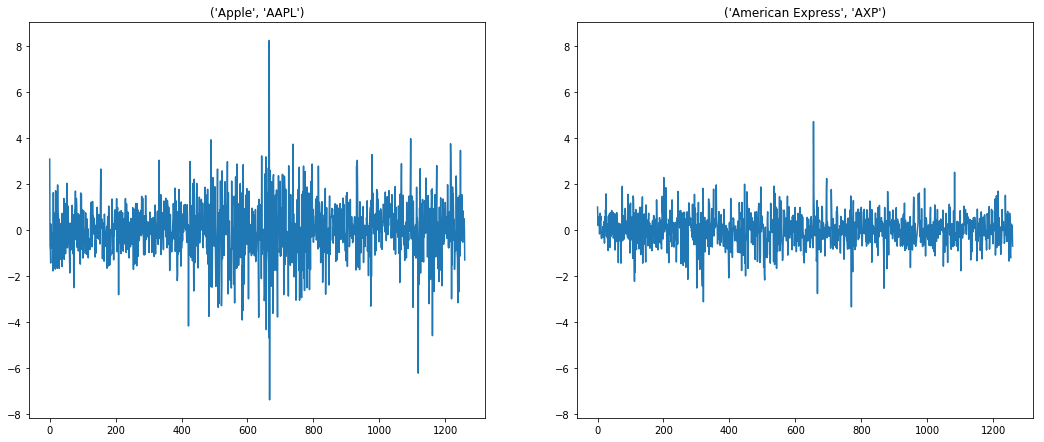

In [89]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize = (18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey= ax1)
plt.plot(movements[2][:])
plt.title(companies[2])

In [90]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

#create the Normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)
print(new.max())
print(new.min())
print(new.mean())

0.22100845881137127
-0.21414017925362192
0.0009608326756173693


Text(0.5, 1.0, "('Amazon', 'AMZN')")

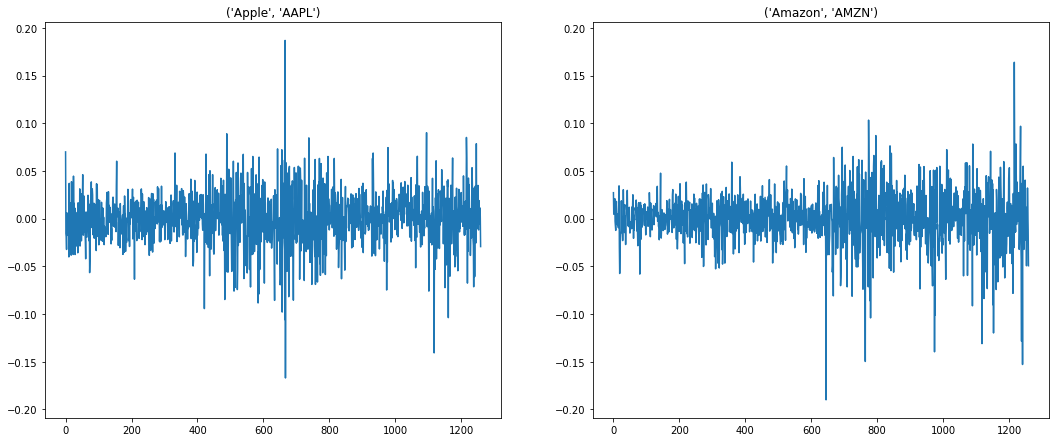

In [91]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize = (18,16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey= ax1)
plt.plot(new[1][:])
plt.title(companies[1])

In [97]:
# Import libraries

from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

# Define normalizer
normalizer = Normalizer()

# Create a Kmeans model - 10 clusters
kmeans = KMeans(n_clusters = 8, max_iter = 10000, n_init = 20)

# Make a pipeline chaining normalizer and kmeans 
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)
print(kmeans.inertia_)



11.538950605953929


In [98]:
# Fit pipeline to daily stock movements
pipeline.fit(movements)
print(kmeans.inertia_)


11.480879091812339


In [100]:
# Import pandas
import pandas as pd

#predict the cluster labels
labels = pipeline.predict(movements)

#create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'Companies': companies})

#display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 Companies
15       0          (McDonalds, MCD)
18       1           (Navistar, NAV)
2        1   (American Express, AXP)
4        1    (Bank of America, BAC)
23       1              (Toyota, TM)
6        1                 (Ford, F)
7        1   (General Electrics, GE)
8        1              (Honda, HMC)
9        1                (IBM, IBM)
21       1               (Sony, SNE)
16       1       (Mitsubishi, MSBHY)
20       2              (Pepsi, PEP)
11       2  (Johnson & Johnson, JNJ)
12       2           (Coca Cola, KO)
17       3         (Microsoft, MSFT)
0        3             (Apple, AAPL)
22       3          (Symantec, SYMC)
24       3  (Texas Instruments, TXN)
1        3            (Amazon, AMZN)
14       3          (MasterCard, MA)
10       3             (Intel, INTC)
27       4              (Exxon, XOM)
5        4            (Chevron, CVX)
3        5              (Boeing, BA)
19       5   (Northrop Grumman, NOC)
13       5    (Lockheed Martin, LMT)
2

In [73]:
from sklearn.decomposition import PCA

#Visualize the results on PCA-reduced data
reduced_data = PCA(n_components = 2).fit_transform(new)

#run kmeans on the reduced data
kmeans = KMeans(n_clusters = 10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels':labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                 companies
0        0             (Apple, AAPL)
24       0  (Texas Instruments, TXN)
22       0          (Symantec, SYMC)
14       0          (MasterCard, MA)
3        1              (Boeing, BA)
7        1   (General Electrics, GE)
25       2      (Valero Energy, VLO)
2        2   (American Express, AXP)
8        2              (Honda, HMC)
11       3  (Johnson & Johnson, JNJ)
15       3          (McDonalds, MCD)
26       3           (Walgreen, WBA)
23       4              (Toyota, TM)
9        4                (IBM, IBM)
16       4       (Mitsubishi, MSBHY)
27       5              (Exxon, XOM)
5        5            (Chevron, CVX)
18       6           (Navistar, NAV)
6        6                 (Ford, F)
4        6    (Bank of America, BAC)
19       7   (Northrop Grumman, NOC)
20       7              (Pepsi, PEP)
12       7           (Coca Cola, KO)
13       7    (Lockheed Martin, LMT)
10       8             (Intel, INTC)
21       8               (Sony, SNE)
1

<Figure size 432x288 with 0 Axes>

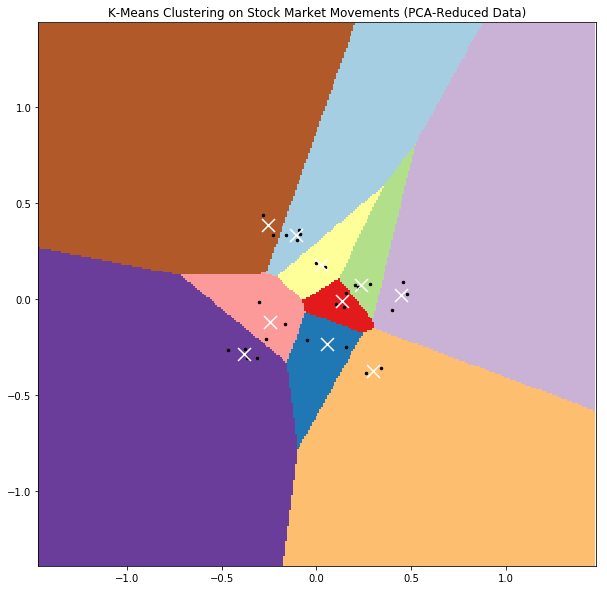

In [78]:
# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Obtain labels for each point in the mesh using out trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#put the result into a color plot
Z = Z.reshape(xx.shape)

#Define colorplot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize = (10,10))
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = cmap,
           aspect = 'auto', origin = 'lower')

plt.plot(reduced_data[:,0], reduced_data[:,1], 'k.', markersize = 5)

#Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],
           marker = 'x', s = 169, linewidths = 3,
           color = 'w', zorder = 10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()